# Confidence for irrigated crop area product?

This notebook explores whether the difference between the 99th and 95th percentiles of NDVI layers can be used to build a confidence layer for our crop product. 

Spoiler alert - not really. It looks like the difference is just noise, rather than picking up some fields in one layer and others in the other. It doesn't look like this difference can be used to work out how confident we are in the classification.

In [34]:
%pylab notebook

import xarray as xr
import numpy as np
from datacube.helpers import write_geotiff
import datacube.utils.geometry

Populating the interactive namespace from numpy and matplotlib


NDVI percentiles bands
* Band 1 = 90th percentile
* Band 2 = 95th percentile
* Band 3 = 99th percentile

In [10]:
NDVIPercentilesFile = '/g/data/r78/cek156/datacube_stats/NDVI_test/ndvi_pct_20101201.tif'
PercentileConfidence = '/g/data/r78/cek156/dea-notebooks/Crop_mapping/NDVIConfidence20101201.tif'

In [3]:
# Open the Geotiff
GeotiffData = xr.open_rasterio(NDVIPercentilesFile)

In [4]:
# Make sure all the missing values are taken out
DatamaxNonull = GeotiffData.where(GeotiffData != -1)

In [5]:
NDVI95th = DatamaxNonull.sel(band = 2)
NDVI99th = DatamaxNonull.sel(band = 3)

In [6]:
Difference = NDVI99th - NDVI95th

In [7]:
Difference = Difference.where(Difference > 0.2)

<IPython.core.display.Javascript object>


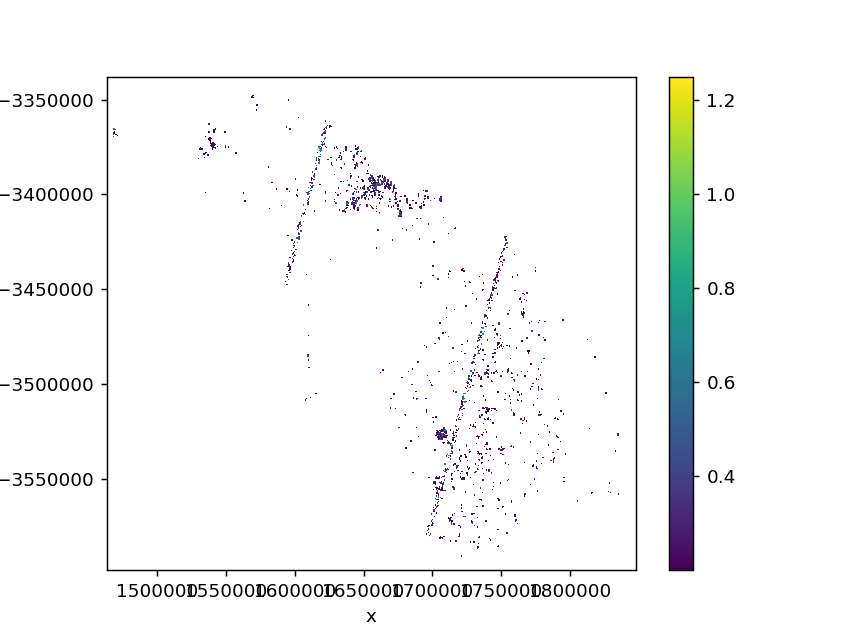

In [8]:
Difference.isel(x = range(0,len(Difference.x),10), y = range(0,len(Difference.y),10)).plot()

In [9]:
Difference

<xarray.DataArray (y: 10399, x: 15386)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * y        (y) float64 -3.338e+06 -3.338e+06 -3.338e+06 -3.338e+06 ...
  * x        (x) float64 1.463e+06 1.463e+06 1.463e+06 1.463e+06 1.463e+06 ...

In [ ]:
Differenceds = Difference.to_dataset(name = 'difference')
Differenceds.attrs['affine'] = GeotiffData.transform[0:-3]
Differenceds.attrs['crs'] = datacube.utils.geometry.CRS(GeotiffData.crs)

write_geotiff(PercentileConfidence, Differenceds)